In [2]:
from unityagents import UnityEnvironment
from dqn_agent import *
import matplotlib.pyplot as plt
%matplotlib inline

# Define the environment

In [3]:
env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe") #modify the path depending on the downloaded environment
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


# DQN-algorithm

In [4]:
def dqn(agent,n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.001, score_max = float("inf"), train_mode = True):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        score_max (float): a score above which stop the training
        train_mode (bool): flag deciding if the agent will learn or just navigate and interact with the environment
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps if train_mode else 0.0)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            if train_mode:
                agent.step(state, action, reward, next_state, done)
            score += reward                                
            state = next_state 
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            if  (np.mean(scores_window)>=score_max) & (train_mode):
                print('\nScore +{} has been reached. Saving the checkpoint...'.format(score_max))
                torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')   
                break  
        if  (np.mean(scores_window)>=score_max) & (i_episode==100) & (~train_mode):
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            break
            
    return scores

# Train the agent

In [5]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores = dqn(agent,score_max = 15)

Episode 100	Average Score: 4.85
Episode 200	Average Score: 9.20
Episode 300	Average Score: 13.24
Episode 400	Average Score: 14.59
Episode 500	Average Score: 15.72

Score +15 has been reached. Saving the checkpoint...


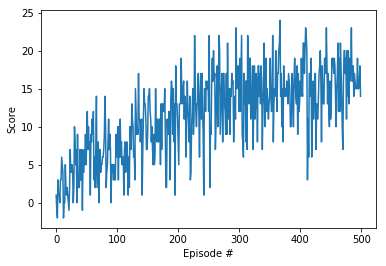

In [6]:
# plot the scores to illustrate the learning process
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Look at the trained agent!

In [7]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0, pretrained_weigths='checkpoint.pth')

In [8]:
scores = dqn(agent, score_max = 13.0, train_mode=False)

Episode 100	Average Score: 15.84

Environment solved in 100 episodes!	Average Score: 15.84


In [9]:
env.close()